# Introduction

In [ ]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=e2cbb046c2745fb347b02f618fc2a9c0cd304d1506a30cb0ecc13f771e6775c5
  Stored in directory: /root/.cache/pip/wheels/f5/0c/3a/61b992f7aa85de40f339e6d4970d91dddb103dd0ad6c5d58f2
Successfully built imutils


In [38]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Activation, Dropout,Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Lambda, Input, AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model, Sequential
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import shutil
import cv2
import os

In [ ]:
dataset_path = './dataset'

## Build Dataset

In [ ]:
%%bash
rm -rf dataset
mkdir -p dataset/covid
mkdir -p dataset/normal

In [39]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
!ls /content/drive/MyDrive

'1903.08983 (1).pdf'
 1903.08983.pdf
 1-s2.0-S0306457313000964-main.pdf
 2020.peoples-1.6.pdf
 2158244020973022.pdf
 2201879.py
 2201879.txt
 3421504.pdf
 3439726.pdf
 6907018.gdoc
 6907018.pdf
 978-1-4614-3223-4_6.pdf
'978-981-15-0694-9 (1).pdf'
 978-981-15-0694-9.pdf
 annurev-polisci-051517-012343.pdf
'archive (4).zip'
 archive.zip
'AS1 Full Factorial design.mpx'
'brighton data'
 CE807
 CE807-24-SP
 CE888_Airlines_High.ipynb
 CE888_Airlines_Low.ipynb
 CE888_Airlines_Med.ipynb
 CE888_Mobile_Price_High.ipynb
 CE888_Mobile_Price_Low.ipynb
 CE888_Mobile_Price_Medium.ipynb
 CE888_Weather_High.ipynb
 CE888_Weather_Low.ipynb
 CE888_Weather_Med.ipynb
'Colab Notebooks'
'Computer network usman.docx'
 covid
'Create a query to establish which invoices are over £200. Sort on'$'\n''TOTAL_VALUE descending.'$'\n''INVOICE_'$'\n''NUMBER IDATE VAT_TOTAL ~0008 11-OCT-23 1.42 8.1 N001'$'\n''100009 10-OCT-23 1.42 8.1 N001'$'\n''100010 11-OCT-23 12.39 70.77 S001'$'\n''write the output of the query.gsheet'


In [41]:
!ls /content/drive/MyDrive/"Shared with me"

ls: cannot access '/content/drive/MyDrive/Shared with me': No such file or directory


In [42]:
dataset_path = "/content/drive/MyDrive/covid"
import os
# List first 5 images
files = os.listdir(dataset_path)
print("Sample image files:", files[:5])

Sample image files: ['1-s2.0-S0140673620303706-fx1_lrg.jpg', '1-s2.0-S0929664620300449-gr2_lrg-c.jpg', '01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg', '1-s2.0-S0929664620300449-gr2_lrg-a.jpg', '1-s2.0-S0929664620300449-gr2_lrg-b.jpg']


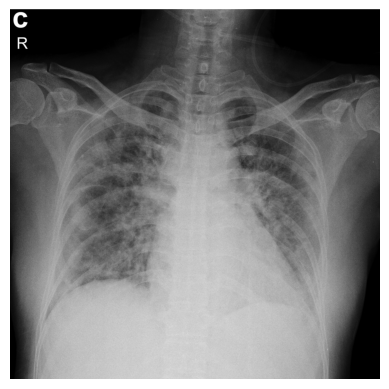

In [43]:
import matplotlib.pyplot as plt
from PIL import Image

# Select an image file
image_file = files[1]  # First image in dataset
image_path = os.path.join(dataset_path, image_file)

# Open and display the image
img = Image.open(image_path)
plt.imshow(img)
plt.axis("off")  # Hide axes
plt.show()


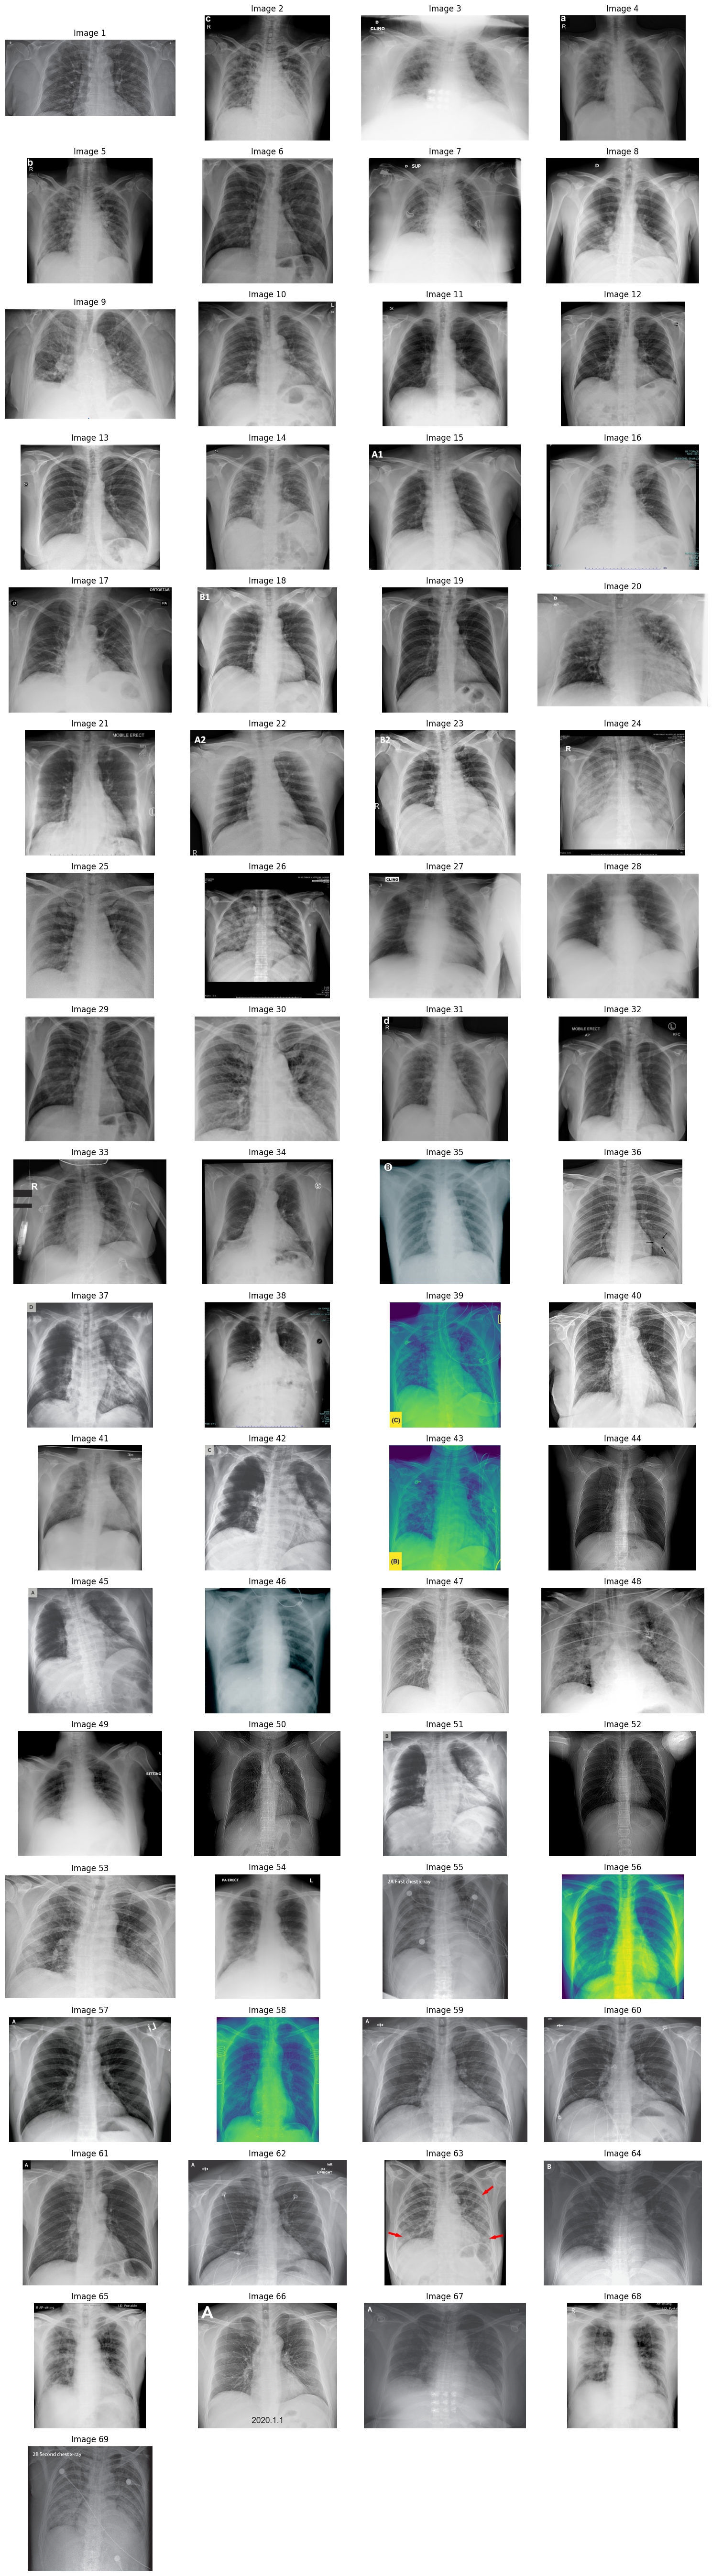

In [44]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Set number of images per row
images_per_row = 4  # Adjust based on preference
num_images = len(files)  # Total number of images

# Determine the number of rows needed
num_rows = (num_images // images_per_row) + (num_images % images_per_row > 0)

# Set figure size
plt.figure(figsize=(15, num_rows * 3))

# Loop through images and display them
for i, image_file in enumerate(files):
    image_path = os.path.join(dataset_path, image_file)

    # Open image
    img = Image.open(image_path)

    # Add subplot
    plt.subplot(num_rows, images_per_row, i + 1)
    plt.imshow(img)
    plt.axis("off")  # Hide axes
    plt.title(f"Image {i+1}")  # Add titles

# Show all images
plt.tight_layout()
plt.show()


In [17]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from PIL import Image
import os
from sklearn.model_selection import train_test_split

# Set image size for input to the model
img_size = (150, 150)  # Resize images to 150x150 pixels

# Create a function to load and preprocess images
def load_images(dataset_path, img_size):
    images = []
    labels = []

    for file in os.listdir(dataset_path):
        img_path = os.path.join(dataset_path, file)

        if file.endswith('.jpg') or file.endswith('.png'):
            # Open image
            img = Image.open(img_path)

            # Convert to RGB (if grayscale)
            img = img.convert('RGB')

            # Resize image to desired size
            img = img.resize(img_size)
            img_array = np.array(img) / 255.0  # Normalize to [0,1]

            images.append(img_array)

            # Assuming 'covid' and 'normal' categories based on the image folder structure
            if 'covid' in file.lower():
                labels.append(0)  # Class 0 for Covid
            else:
                labels.append(1)  # Class 1 for Normal

    return np.array(images), np.array(labels)

# Load and preprocess the dataset
images, labels = load_images(dataset_path, img_size)

# Convert labels to one-hot encoding
labels = to_categorical(labels, num_classes=2)

# Split dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)



In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten and add fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(2, activation='softmax'))  # 2 output classes

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,610 (40.58 MB)

 Trainable params: 10,636,610 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.1923 - loss: 0.7499 - val_accuracy: 0.5714 - val_loss: 9.0870
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8846 - loss: 2.0262 - val_accuracy: 0.5714 - val_loss: 8.9913
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8846 - loss: 2.5669 - val_accuracy: 0.5714 - val_loss: 5.9818
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8846 - loss: 1.2539 - val_accuracy: 0.5714 - val_loss: 3.4363
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8846 - loss: 0.8386 - val_accuracy: 0.5714 - val_loss: 1.5650
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8846 - loss: 0.3286 - val_accuracy: 0.5714 - val_loss: 0.9948
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8846 - loss: 0.3377 - val_accuracy: 0.5714 - val_loss: 0.8910
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8846 - loss: 0.3767 - val_accuracy: 0.5714 - val_loss: 0.9640
Epoch 9/10
1/1 ━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.57      1.00      0.73         4

    accuracy                           0.57         7
   macro avg       0.29      0.50      0.36         7
weighted avg       0.33      0.57      0.42         7

Confusion Matrix:
[[0 3]
 [0 4]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


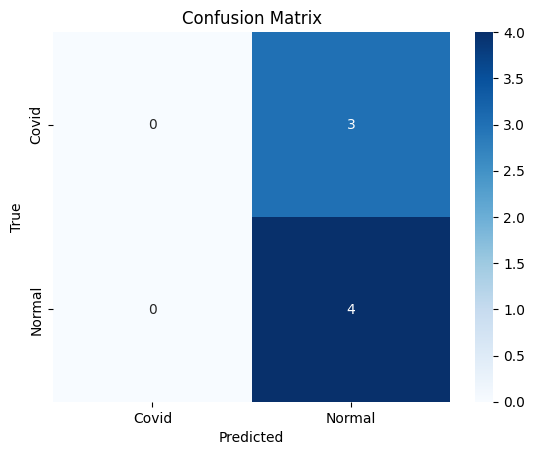

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Predict on the validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_val_classes = np.argmax(y_val, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_val_classes, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_val_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Covid', 'Normal'], yticklabels=['Covid', 'Normal'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [24]:
# Save the trained model to a file
model.save('/content/model.h5')  # Replace with your desired save path
print("Model saved successfully.")

Model saved successfully.


Model: "functional_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,212,546 (12.25 MB)

 Trainable params: 3,212,546 (12.25 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.9081 - loss: 0.6272 - val_accuracy: 0.8571 - val_loss: 2.4442
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.9203 - loss: 1.3105 - val_accuracy: 0.8571 - val_loss: 2.2240
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.9411 - loss: 0.8922 - val_accuracy: 0.8571 - val_loss: 1.5253
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.9307 - loss: 0.9077 - val_accuracy: 0.8571 - val_loss: 0.8181
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.8614 - loss: 0.4411 - val_accuracy: 0.8571 - val_loss: 0.4286
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.6568 - loss: 0.7890 - val_accuracy: 0.8571 - val_loss: 0.4846
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8839 - loss: 0.2435 - val_accuracy: 0.8571 - val_loss: 0.5889
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.9307 - loss: 0.3741 - val_accuracy: 0.8571 - val_loss: 0.6264
Epoch 9/10
2/2 ━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


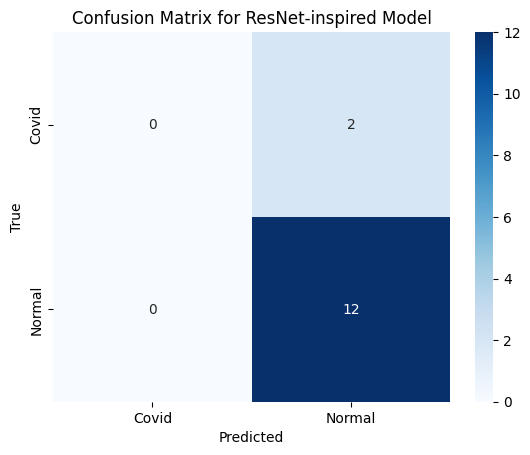

In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Add
from tensorflow.keras.optimizers import Adam

# Build the ResNet-inspired model
input_layer = Input(shape=(img_size[0], img_size[1], 3))

# Initial Conv Layer
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = MaxPooling2D((2, 2))(x)

# Residual Block 1
residual_1 = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
residual_1 = Conv2D(64, (3, 3), activation='relu', padding='same')(residual_1)
x = MaxPooling2D((2, 2))(x)

# Residual Block 2
residual_2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
residual_2 = Conv2D(128, (3, 3), activation='relu', padding='same')(residual_2)
x = MaxPooling2D((2, 2))(x)

# Flatten and add fully connected layers
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
output_layer = Dense(2, activation='softmax')(x)  # 2 output classes

# Create and compile the model
model_resnet = Model(inputs=input_layer, outputs=output_layer)

model_resnet.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize the model
model_resnet.summary()

# Train the model
history_resnet = model_resnet.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on validation data
y_pred_resnet = model_resnet.predict(X_val)
y_pred_classes_resnet = np.argmax(y_pred_resnet, axis=1)
y_val_classes_resnet = np.argmax(y_val, axis=1)

# Classification Report
print("Classification Report for ResNet-inspired Model:")
print(classification_report(y_val_classes_resnet, y_pred_classes_resnet))

# Confusion Matrix
cm_resnet = confusion_matrix(y_val_classes_resnet, y_pred_classes_resnet)
print("Confusion Matrix for ResNet-inspired Model:")
print(cm_resnet)

# Plot confusion matrix
sns.heatmap(cm_resnet, annot=True, fmt='d', cmap='Blues', xticklabels=['Covid', 'Normal'], yticklabels=['Covid', 'Normal'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for ResNet-inspired Model')
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 512)                 │      77,070,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,202,690 (294.50 MB)

 Trainable params: 77,202,690 (294.50 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2364 - loss: 1.1022 - val_accuracy: 0.8571 - val_loss: 80.4349
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9273 - loss: 36.7372 - val_accuracy: 0.8571 - val_loss: 76.4357
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9273 - loss: 39.3177 - val_accuracy: 0.8571 - val_loss: 57.4454
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.9273 - loss: 18.8668 - val_accuracy: 0.8571 - val_loss: 32.7737
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9273 - loss: 21.4174 - val_accuracy: 0.6429 - val_loss: 0.9466
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6545 - loss: 19.2778 - val_accuracy: 0.8571 - val_loss: 14.6537
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8182 - loss: 17.3100 - val_accuracy: 0.8571 - val_loss: 40.9587
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9273 - loss: 23.7694 - val_accuracy: 0.8571 - val_loss: 54.5423
Ep

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
Classification Report for MLP Model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.86      1.00      0.92        12

    accuracy                           0.86        14
   macro avg       0.43      0.50      0.46        14
weighted avg       0.73      0.86      0.79        14

Confusion Matrix for MLP Model:
[[ 0  2]
 [ 0 12]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


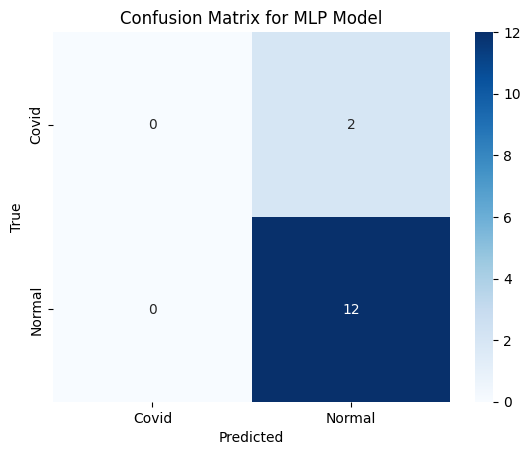

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# Flatten image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Build the MLP model
model_mlp = Sequential()

# Input layer
model_mlp.add(Dense(512, activation='relu', input_shape=(X_train_flat.shape[1],)))
model_mlp.add(Dropout(0.3))  # Dropout to prevent overfitting

# Hidden layer
model_mlp.add(Dense(256, activation='relu'))
model_mlp.add(Dropout(0.3))

# Output layer
model_mlp.add(Dense(2, activation='softmax'))  # 2 output classes

# Compile the model
model_mlp.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Summarize the model
model_mlp.summary()

# Train the model (faster training due to simpler architecture)
history_mlp = model_mlp.fit(X_train_flat, y_train, epochs=10, batch_size=64, validation_data=(X_val_flat, y_val))

# Evaluate the model on validation data
y_pred_mlp = model_mlp.predict(X_val_flat)
y_pred_classes_mlp = np.argmax(y_pred_mlp, axis=1)
y_val_classes_mlp = np.argmax(y_val, axis=1)

# Classification Report
print("Classification Report for MLP Model:")
print(classification_report(y_val_classes_mlp, y_pred_classes_mlp))

# Confusion Matrix
cm_mlp = confusion_matrix(y_val_classes_mlp, y_pred_classes_mlp)
print("Confusion Matrix for MLP Model:")
print(cm_mlp)

# Plot confusion matrix
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=['Covid', 'Normal'], yticklabels=['Covid', 'Normal'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for MLP Model')
plt.show()


### Covid xray dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
samples = 25

In [ ]:
covid_dataset_path = '../input/covid-chest-xray'

In [ ]:
# construct the path to the metadata CSV file and load it
csvPath = os.path.sep.join([covid_dataset_path, "metadata.csv"])
df = pd.read_csv(csvPath)

# loop over the rows of the COVID-19 data frame
for (i, row) in df.iterrows():
    # if (1) the current case is not COVID-19 or (2) this is not
    # a 'PA' view, then ignore the row
    if row["finding"] != "COVID-19" or row["view"] != "PA":
        continue

    # build the path to the input image file
    imagePath = os.path.sep.join([covid_dataset_path, "images", row["filename"]])

    # if the input image file does not exist (there are some errors in
    # the COVID-19 metadeta file), ignore the row
    if not os.path.exists(imagePath):
        continue

    # extract the filename from the image path and then construct the
    # path to the copied image file
    filename = row["filename"].split(os.path.sep)[-1]
    outputPath = os.path.sep.join([f"{dataset_path}/covid", filename])

    # copy the image
    shutil.copy2(imagePath, outputPath)

### Build normal xray dataset

In [ ]:
pneumonia_dataset_path ='../input/chest-xray-pneumonia/chest_xray'

In [ ]:
basePath = os.path.sep.join([pneumonia_dataset_path, "train", "NORMAL"])
imagePaths = list(paths.list_images(basePath))

# randomly sample the image paths
random.seed(42)
random.shuffle(imagePaths)
imagePaths = imagePaths[:samples]

# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
    # extract the filename from the image path and then construct the
    # path to the copied image file
    filename = imagePath.split(os.path.sep)[-1]
    outputPath = os.path.sep.join([f"{dataset_path}/normal", filename])

    # copy the image
    shutil.copy2(imagePath, outputPath)

## Plot x-rays

Helper function to plot the images in a grid

In [ ]:
def ceildiv(a, b):
    return -(-a // b)

def plots_from_files(imspaths, figsize=(10,5), rows=1, titles=None, maintitle=None):
    """Plot the images in a grid"""
    f = plt.figure(figsize=figsize)
    if maintitle is not None: plt.suptitle(maintitle, fontsize=10)
    for i in range(len(imspaths)):
        sp = f.add_subplot(rows, ceildiv(len(imspaths), rows), i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        img = plt.imread(imspaths[i])
        plt.imshow(img)

In [ ]:
normal_images = list(paths.list_images(f"{dataset_path}/normal"))
covid_images = list(paths.list_images(f"{dataset_path}/covid"))

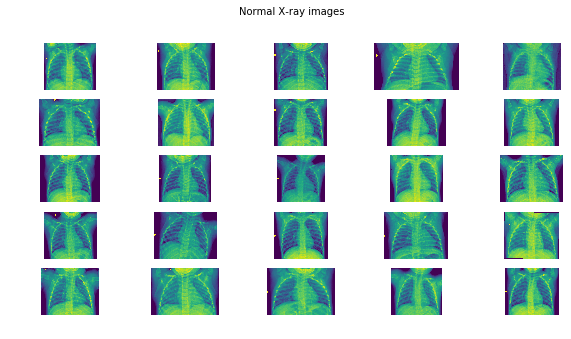

In [ ]:
plots_from_files(normal_images, rows=5, maintitle="Normal X-ray images")

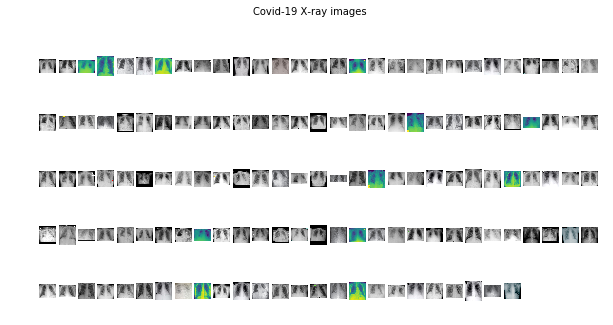

In [ ]:
plots_from_files(covid_images, rows=5, maintitle="Covid-19 X-ray images")

## Data preprocessing

In [ ]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 30
BS = 8

In [ ]:
# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")
imagePaths = list(paths.list_images(dataset_path))
data = []
labels = []
# loop over the image paths
for imagePath in imagePaths:
    # extract the class label from the filename
    label = imagePath.split(os.path.sep)[-2]
    # load the image, swap color channels, and resize it to be a fixed
    # 224x224 pixels while ignoring aspect ratio
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    # update the data and labels lists, respectively
    data.append(image)
    labels.append(label)
# convert the data and labels to NumPy arrays while scaling the pixel
# intensities to the range [0, 1]
data = np.array(data) / 255.0
labels = np.array(labels)

[INFO] loading images...


## Model

In [ ]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)
# initialize the training data augmentation object
trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")

In [ ]:
# load the VGG16 network, ensuring the head FC layer sets are left
# off
baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.6)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


### Training

In [ ]:
# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
    trainAug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

[INFO] compiling model...
[INFO] training head...
Train for 16 steps, validate on 34 samples
Epoch 1/30
16/16 [==============================] - 5s 291ms/step - loss: 0.5481 - accuracy: 0.7742 - val_loss: 0.3845 - val_accuracy: 0.8750
Epoch 2/30
16/16 [==============================] - 1s 83ms/step - loss: 0.4331 - accuracy: 0.8468 - val_loss: 0.3008 - val_accuracy: 0.8750
Epoch 3/30
16/16 [==============================] - 1s 86ms/step - loss: 0.3759 - accuracy: 0.8306 - val_loss: 0.2703 - val_accuracy: 0.8750
Epoch 4/30
16/16 [==============================] - 1s 83ms/step - loss: 0.3091 - accuracy: 0.8629 - val_loss: 0.2358 - val_accuracy: 0.8750
Epoch 5/30
16/16 [==============================] - 1s 83ms/step - loss: 0.2613 - accuracy: 0.8952 - val_loss: 0.2061 - val_accuracy: 0.9062
Epoch 6/30
16/16 [==============================] - 1s 82ms/step - loss: 0.2119 - accuracy: 0.8952 - val_loss: 0.1842 - val_accuracy: 0.9375
Epoch 7/30
16/16 [==============================] - 1s 81ms/

### Save Model

In [ ]:
model.save('/kaggle/working/covid_vgg.h5')

### Plot trining metrics

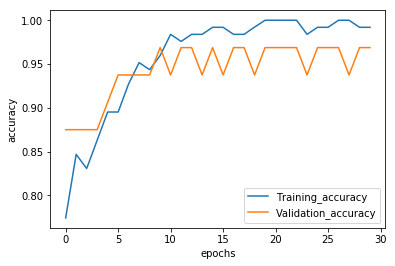

In [ ]:
accs = H.history['accuracy']
val_accs = H.history['val_accuracy']

plt.plot(range(len(accs)),accs, label = 'Training_accuracy')
plt.plot(range(len(accs)),val_accs, label = 'Validation_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

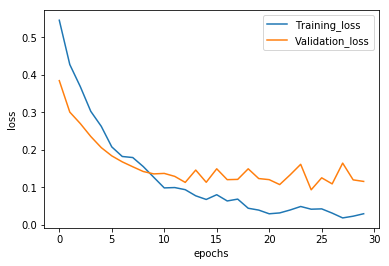

In [ ]:
loss = H.history['loss']
val_loss = H.history['val_loss']

plt.plot(range(len(accs)),loss, label = 'Training_loss')
plt.plot(range(len(accs)),val_loss, label = 'Validation_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

**Accuracy and Loss curve in single graph**

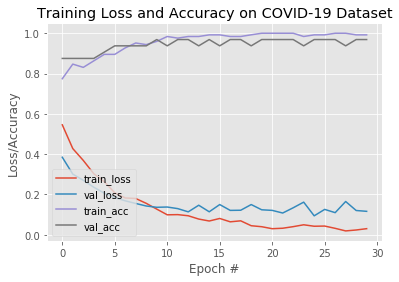

In [ ]:
# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

### Evaluation

In [ ]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)
# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       covid       0.97      1.00      0.98        29
      normal       1.00      0.80      0.89         5

    accuracy                           0.97        34
   macro avg       0.98      0.90      0.94        34
weighted avg       0.97      0.97      0.97        34



#### Confusion matrix

In [ ]:
# compute the confusion matrix and and use it to derive the raw
# accuracy, sensitivity, and specificity
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[29  0]
 [ 1  4]]
acc: 0.9706
sensitivity: 1.0000
specificity: 0.8000


### load and test model

In [ ]:
from tensorflow.keras.models import load_model
# Recreate the exact same model, including its weights and the optimizer
new_model = load_model('./covid_vgg.h5')

# Show the model architecture
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

[[1. 0.]]
[0]


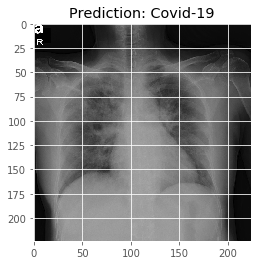

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image


#test_image = cv2.imread('../input/covid-chest-xray/images/1-s2.0-S1684118220300608-main.pdf-002.jpg')
#test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
#test_image = cv2.resize(test_image, (224, 224))
#test_image = np.expand_dims(test_image, axis = 0)

img_width, img_height = 224, 224
img = image.load_img('../input/covid-chest-xray/images/1-s2.0-S0929664620300449-gr2_lrg-a.jpg', target_size = (img_width, img_height))
x = image.img_to_array(img)
img = np.expand_dims(x, axis = 0)

pred = new_model.predict(img)
print(pred)

#one = new_model.predict('../input/covid-chest-xray/images/1-s2.0-S1684118220300608-main.pdf-002.jpg', batch_size = BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
print(np.argmax(pred, axis=1))
if np.argmax(pred, axis=1)[0] == 1:
    plt.title('Prediction: Non_Covid-19')
else:
    plt.title('Prediction: Covid-19')
plt.imshow(x/255.)
plt.savefig('plot_out.png')

[[9.888702e-12 1.000000e+00]]
1


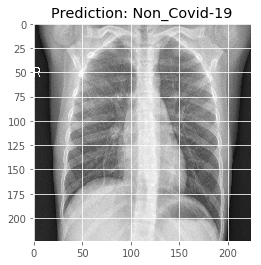

In [ ]:
img_width, img_height = 224, 224
img = image.load_img('../input/chest-xray-pneumonia/chest_xray/test/NORMAL/IM-0003-0001.jpeg', target_size = (img_width, img_height))
x = image.img_to_array(img)
img = np.expand_dims(x, axis = 0)

pred = new_model.predict(img)
print(pred)

#one = new_model.predict('../input/covid-chest-xray/images/1-s2.0-S1684118220300608-main.pdf-002.jpg', batch_size = BS)
# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
print(np.argmax(pred, axis=1)[0])
if np.argmax(pred, axis=1)[0] == 1:
    plt.title('Prediction: Non_Covid-19')
else:
    plt.title('Prediction: Covid-19')
plt.imshow(x/255.)